<i>Importing  Libraries</i>

In [1]:
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')


<i>Reading data</i>

In [2]:
def read_data (file_path):
    _, file_extension= os.path.splitext(file_path)
    file_extension=file_extension.lower()

    if file_extension in ['.csv']:
        return pd.read_csv(file_path)
    elif file_extension in ['.xlsx', '.xls']:
        return pd.read_excel(file_path)
    elif file_extension in ['.json']:
        return pd.read_json(file_path)
    elif file_extension in ['.parquet']:
        return pd.read_parquet(file_path)
    elif file_extension in ['.tsv']:
        return pd.read_csv(file_path, sep='\t')
    elif file_extension in ['.pkl', '.pickle']:
        return pd.read_pickle(file_path)
    elif file_extension in ['.html']:
        return pd.read_html(file_path)[0]  # returns a list of DataFrames
    elif file_extension in ['.feather']:
        return pd.read_feather(file_path)
    elif file_extension in ['.orc']:
        return pd.read_orc(file_path)
    else:
        raise ValueError(f"Unsupported file format: {file_extension}")


In [3]:
data=read_data("C:\\Users\\admin\\OneDrive\\Desktop\\PRACTICE_PROJECT\\PROJECT1\\DATASET\\JEE_Dropout_After_Class_12.csv")

In [4]:
data

,jee_main_score,jee_advanced_score,mock_test_score_avg,school_board,class_12_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,78.95,59.22,59.86,CBSE,70.09,1,FIITJEE,5.4,Low,Upto 10th,Urban,Low,No,No,1
1,70.06,58.75,64.33,State,78.00,1,FIITJEE,5.5,Mid,Upto 10th,Urban,Low,Yes,No,0
2,81.07,37.27,60.83,ICSE,64.36,1,FIITJEE,7.0,Low,PG,Semi-Urban,Medium,Yes,No,1
3,93.32,60.72,69.33,ICSE,73.21,1,FIITJEE,2.1,Low,12th,Semi-Urban,Medium,Yes,Yes,0
4,68.72,77.73,82.37,CBSE,89.02,1,Allen,6.3,Mid,Graduate,Semi-Urban,High,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,71.31,86.82,57.08,State,84.45,1,FIITJEE,4.7,High,PG,Semi-Urban,High,Yes,Yes,0
4996,81.96,34.03,82.85,CBSE,73.02,2,Local,4.7,Mid,PG,Urban,High,Yes,Yes,0
4997,100.00,54.71,83.75,CBSE,77.87,2,NaN,6.3,Mid,PG,Semi-Urban,Medium,Yes,Yes,0
4998,83.31,73.93,57.39,CBSE,62.25,1,Allen,4.0,High,Upto 10th,Urban,Low,No,Yes,0


#### <i> Now will do some data analysis</i>

<i>Get the shape of dataset</i>

In [5]:
data.shape

(5000, 15)

<i>Get the basic info about the dataset</i>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   jee_main_score        5000 non-null   float64
 1   jee_advanced_score    5000 non-null   float64
 2   mock_test_score_avg   5000 non-null   float64
 3   school_board          5000 non-null   object 
 4   class_12_percent      5000 non-null   float64
 5   attempt_count         5000 non-null   int64  
 6   coaching_institute    3791 non-null   object 
 7   daily_study_hours     5000 non-null   float64
 8   family_income         5000 non-null   object 
 9   parent_education      5000 non-null   object 
 10  location_type         5000 non-null   object 
 11  peer_pressure_level   5000 non-null   object 
 12  mental_health_issues  5000 non-null   object 
 13  admission_taken       5000 non-null   object 
 14  dropout               5000 non-null   int64  
dtypes: float64(5), int64(

<i>Copying the original dataset</i>

In [7]:
copy_data=data.copy()
copy_data

,jee_main_score,jee_advanced_score,mock_test_score_avg,school_board,class_12_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,78.95,59.22,59.86,CBSE,70.09,1,FIITJEE,5.4,Low,Upto 10th,Urban,Low,No,No,1
1,70.06,58.75,64.33,State,78.00,1,FIITJEE,5.5,Mid,Upto 10th,Urban,Low,Yes,No,0
2,81.07,37.27,60.83,ICSE,64.36,1,FIITJEE,7.0,Low,PG,Semi-Urban,Medium,Yes,No,1
3,93.32,60.72,69.33,ICSE,73.21,1,FIITJEE,2.1,Low,12th,Semi-Urban,Medium,Yes,Yes,0
4,68.72,77.73,82.37,CBSE,89.02,1,Allen,6.3,Mid,Graduate,Semi-Urban,High,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,71.31,86.82,57.08,State,84.45,1,FIITJEE,4.7,High,PG,Semi-Urban,High,Yes,Yes,0
4996,81.96,34.03,82.85,CBSE,73.02,2,Local,4.7,Mid,PG,Urban,High,Yes,Yes,0
4997,100.00,54.71,83.75,CBSE,77.87,2,NaN,6.3,Mid,PG,Semi-Urban,Medium,Yes,Yes,0
4998,83.31,73.93,57.39,CBSE,62.25,1,Allen,4.0,High,Upto 10th,Urban,Low,No,Yes,0


#### <i>i)Memory optimization</i>

<i>i) Score column will maximum take within 5 to 6 digits. So it doesn't require 64 bits</i>

In [8]:
for col in copy_data.select_dtypes(include='float64').columns:
    copy_data[col]=copy_data[col].astype('float32')

In [9]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   jee_main_score        5000 non-null   float32
 1   jee_advanced_score    5000 non-null   float32
 2   mock_test_score_avg   5000 non-null   float32
 3   school_board          5000 non-null   object 
 4   class_12_percent      5000 non-null   float32
 5   attempt_count         5000 non-null   int64  
 6   coaching_institute    3791 non-null   object 
 7   daily_study_hours     5000 non-null   float32
 8   family_income         5000 non-null   object 
 9   parent_education      5000 non-null   object 
 10  location_type         5000 non-null   object 
 11  peer_pressure_level   5000 non-null   object 
 12  mental_health_issues  5000 non-null   object 
 13  admission_taken       5000 non-null   object 
 14  dropout               5000 non-null   int64  
dtypes: float32(5), int64(

In [10]:
copy_data

,jee_main_score,jee_advanced_score,mock_test_score_avg,school_board,class_12_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,78.949997,59.220001,59.860001,CBSE,70.089996,1,FIITJEE,5.4,Low,Upto 10th,Urban,Low,No,No,1
1,70.059998,58.750000,64.330002,State,78.000000,1,FIITJEE,5.5,Mid,Upto 10th,Urban,Low,Yes,No,0
2,81.070000,37.270000,60.830002,ICSE,64.360001,1,FIITJEE,7.0,Low,PG,Semi-Urban,Medium,Yes,No,1
3,93.320000,60.720001,69.330002,ICSE,73.209999,1,FIITJEE,2.1,Low,12th,Semi-Urban,Medium,Yes,Yes,0
4,68.720001,77.730003,82.370003,CBSE,89.019997,1,Allen,6.3,Mid,Graduate,Semi-Urban,High,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,71.309998,86.820000,57.080002,State,84.449997,1,FIITJEE,4.7,High,PG,Semi-Urban,High,Yes,Yes,0
4996,81.959999,34.029999,82.849998,CBSE,73.019997,2,Local,4.7,Mid,PG,Urban,High,Yes,Yes,0
4997,100.000000,54.709999,83.750000,CBSE,77.870003,2,NaN,6.3,Mid,PG,Semi-Urban,Medium,Yes,Yes,0
4998,83.309998,73.930000,57.389999,CBSE,62.250000,1,Allen,4.0,High,Upto 10th,Urban,Low,No,Yes,0


<i>To display float format as 2 digits</i>

In [11]:
pd.options.display.float_format = '{:.2f}'.format

In [12]:
copy_data

,jee_main_score,jee_advanced_score,mock_test_score_avg,school_board,class_12_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,78.95,59.22,59.86,CBSE,70.09,1,FIITJEE,5.40,Low,Upto 10th,Urban,Low,No,No,1
1,70.06,58.75,64.33,State,78.00,1,FIITJEE,5.50,Mid,Upto 10th,Urban,Low,Yes,No,0
2,81.07,37.27,60.83,ICSE,64.36,1,FIITJEE,7.00,Low,PG,Semi-Urban,Medium,Yes,No,1
3,93.32,60.72,69.33,ICSE,73.21,1,FIITJEE,2.10,Low,12th,Semi-Urban,Medium,Yes,Yes,0
4,68.72,77.73,82.37,CBSE,89.02,1,Allen,6.30,Mid,Graduate,Semi-Urban,High,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,71.31,86.82,57.08,State,84.45,1,FIITJEE,4.70,High,PG,Semi-Urban,High,Yes,Yes,0
4996,81.96,34.03,82.85,CBSE,73.02,2,Local,4.70,Mid,PG,Urban,High,Yes,Yes,0
4997,100.00,54.71,83.75,CBSE,77.87,2,NaN,6.30,Mid,PG,Semi-Urban,Medium,Yes,Yes,0
4998,83.31,73.93,57.39,CBSE,62.25,1,Allen,4.00,High,Upto 10th,Urban,Low,No,Yes,0


<i>ii) 'attempt_count' and 'dropout Column' don't require really 64 bits. So reducing to 8 bits</i>

In [13]:
for col in copy_data.select_dtypes(include='int64'):
    copy_data[col]=copy_data[col].astype('int8')

In [14]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   jee_main_score        5000 non-null   float32
 1   jee_advanced_score    5000 non-null   float32
 2   mock_test_score_avg   5000 non-null   float32
 3   school_board          5000 non-null   object 
 4   class_12_percent      5000 non-null   float32
 5   attempt_count         5000 non-null   int8   
 6   coaching_institute    3791 non-null   object 
 7   daily_study_hours     5000 non-null   float32
 8   family_income         5000 non-null   object 
 9   parent_education      5000 non-null   object 
 10  location_type         5000 non-null   object 
 11  peer_pressure_level   5000 non-null   object 
 12  mental_health_issues  5000 non-null   object 
 13  admission_taken       5000 non-null   object 
 14  dropout               5000 non-null   int8   
dtypes: float32(5), int8(2

<i>iii) When a column of object dtype (typically strings) contains only a few unique values repeated across many rows, converting it to category dtype in pandas is a great way to reduce memory usage significantly.</i>

<i>object dtype 

    stores each string as a separate Python object → high memory usage.

category dtype stores:

    A list of unique values (called categories)

    A numeric array of codes referring to these values
    
</i>

<i>To get unique values of each column</i>

In [15]:
copy_data.nunique()

jee_main_score          3113
jee_advanced_score      3304
mock_test_score_avg     3023
school_board               3
class_12_percent        2776
attempt_count              2
coaching_institute         3
daily_study_hours        101
family_income              3
parent_education           4
location_type              3
peer_pressure_level        3
mental_health_issues       2
admission_taken            2
dropout                    2
dtype: int64

In [16]:
for col in copy_data.select_dtypes(include='object').columns:
    copy_data[col]=copy_data[col].astype('category')

In [17]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   jee_main_score        5000 non-null   float32 
 1   jee_advanced_score    5000 non-null   float32 
 2   mock_test_score_avg   5000 non-null   float32 
 3   school_board          5000 non-null   category
 4   class_12_percent      5000 non-null   float32 
 5   attempt_count         5000 non-null   int8    
 6   coaching_institute    3791 non-null   category
 7   daily_study_hours     5000 non-null   float32 
 8   family_income         5000 non-null   category
 9   parent_education      5000 non-null   category
 10  location_type         5000 non-null   category
 11  peer_pressure_level   5000 non-null   category
 12  mental_health_issues  5000 non-null   category
 13  admission_taken       5000 non-null   category
 14  dropout               5000 non-null   int8    
dtypes: c

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   jee_main_score        5000 non-null   float64
 1   jee_advanced_score    5000 non-null   float64
 2   mock_test_score_avg   5000 non-null   float64
 3   school_board          5000 non-null   object 
 4   class_12_percent      5000 non-null   float64
 5   attempt_count         5000 non-null   int64  
 6   coaching_institute    3791 non-null   object 
 7   daily_study_hours     5000 non-null   float64
 8   family_income         5000 non-null   object 
 9   parent_education      5000 non-null   object 
 10  location_type         5000 non-null   object 
 11  peer_pressure_level   5000 non-null   object 
 12  mental_health_issues  5000 non-null   object 
 13  admission_taken       5000 non-null   object 
 14  dropout               5000 non-null   int64  
dtypes: float64(5), int64(

<i>Memory usage for each column in KB:

    Before and after memory optimization 
</i>

In [19]:
data.memory_usage(deep=True)/1024

Index                    0.13
jee_main_score          39.06
jee_advanced_score      39.06
mock_test_score_avg     39.06
school_board           260.35
class_12_percent        39.06
attempt_count           39.06
coaching_institute     240.23
daily_study_hours       39.06
family_income          255.53
parent_education       267.43
location_type          271.87
peer_pressure_level    260.45
mental_health_issues   251.39
admission_taken        251.46
dropout                 39.06
dtype: float64

In [20]:
copy_data.memory_usage(deep=True)/1024

Index                   0.13
jee_main_score         19.53
jee_advanced_score     19.53
mock_test_score_avg    19.53
school_board            5.14
class_12_percent       19.53
attempt_count           4.88
coaching_institute      5.15
daily_study_hours      19.53
family_income           5.14
parent_education        5.26
location_type           5.15
peer_pressure_level     5.14
mental_health_issues    5.09
admission_taken         5.09
dropout                 4.88
dtype: float64

<i>Memory usage in KB</i>

In [21]:
memory=(data.memory_usage(deep=True)/1024).sum()
memory

np.float64(2332.27734375)

In [22]:
memory=(copy_data.memory_usage(deep=True)/1024).sum()
memory

np.float64(148.7236328125)

<i> reduces RAM usage, making data processing faster and more efficient. It helps handle larger datasets without crashing or slowing down your system.</i>





#### <i>ii) Data cleaning</i>

<i>i) Handling Duplicates</i>

For each row

In [23]:
copy_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

for all Columns

In [24]:
copy_data[copy_data.duplicated()]

,jee_main_score,jee_advanced_score,mock_test_score_avg,school_board,class_12_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout


Quick count of how many duplicate rows are present in the dataset.

In [25]:
copy_data.duplicated().sum()

np.int64(0)

To Drop Duplicates 

In [26]:
copy_data.drop_duplicates()

,jee_main_score,jee_advanced_score,mock_test_score_avg,school_board,class_12_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,78.95,59.22,59.86,CBSE,70.09,1,FIITJEE,5.40,Low,Upto 10th,Urban,Low,No,No,1
1,70.06,58.75,64.33,State,78.00,1,FIITJEE,5.50,Mid,Upto 10th,Urban,Low,Yes,No,0
2,81.07,37.27,60.83,ICSE,64.36,1,FIITJEE,7.00,Low,PG,Semi-Urban,Medium,Yes,No,1
3,93.32,60.72,69.33,ICSE,73.21,1,FIITJEE,2.10,Low,12th,Semi-Urban,Medium,Yes,Yes,0
4,68.72,77.73,82.37,CBSE,89.02,1,Allen,6.30,Mid,Graduate,Semi-Urban,High,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,71.31,86.82,57.08,State,84.45,1,FIITJEE,4.70,High,PG,Semi-Urban,High,Yes,Yes,0
4996,81.96,34.03,82.85,CBSE,73.02,2,Local,4.70,Mid,PG,Urban,High,Yes,Yes,0
4997,100.00,54.71,83.75,CBSE,77.87,2,NaN,6.30,Mid,PG,Semi-Urban,Medium,Yes,Yes,0
4998,83.31,73.93,57.39,CBSE,62.25,1,Allen,4.00,High,Upto 10th,Urban,Low,No,Yes,0


Here we don't have any Duplicates in this dataset. So getting same result without dropping  any data.

<i>ii) Handling Missing Values</i>

For each row and Columns

In [27]:
copy_data.isnull()

,jee_main_score,jee_advanced_score,mock_test_score_avg,school_board,class_12_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
copy_data.isna()

,jee_main_score,jee_advanced_score,mock_test_score_avg,school_board,class_12_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Quick count of how many missing values are present in the dataset.

In [29]:
copy_data.isnull().sum()

jee_main_score             0
jee_advanced_score         0
mock_test_score_avg        0
school_board               0
class_12_percent           0
attempt_count              0
coaching_institute      1209
daily_study_hours          0
family_income              0
parent_education           0
location_type              0
peer_pressure_level        0
mental_health_issues       0
admission_taken            0
dropout                    0
dtype: int64

In [30]:
copy_data.isna().sum()

jee_main_score             0
jee_advanced_score         0
mock_test_score_avg        0
school_board               0
class_12_percent           0
attempt_count              0
coaching_institute      1209
daily_study_hours          0
family_income              0
parent_education           0
location_type              0
peer_pressure_level        0
mental_health_issues       0
admission_taken            0
dropout                    0
dtype: int64

We can fill missing values with many methods [Numerical, Categorical].

In [31]:
copy_data1=copy_data.copy()
copy_data1

,jee_main_score,jee_advanced_score,mock_test_score_avg,school_board,class_12_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,78.95,59.22,59.86,CBSE,70.09,1,FIITJEE,5.40,Low,Upto 10th,Urban,Low,No,No,1
1,70.06,58.75,64.33,State,78.00,1,FIITJEE,5.50,Mid,Upto 10th,Urban,Low,Yes,No,0
2,81.07,37.27,60.83,ICSE,64.36,1,FIITJEE,7.00,Low,PG,Semi-Urban,Medium,Yes,No,1
3,93.32,60.72,69.33,ICSE,73.21,1,FIITJEE,2.10,Low,12th,Semi-Urban,Medium,Yes,Yes,0
4,68.72,77.73,82.37,CBSE,89.02,1,Allen,6.30,Mid,Graduate,Semi-Urban,High,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,71.31,86.82,57.08,State,84.45,1,FIITJEE,4.70,High,PG,Semi-Urban,High,Yes,Yes,0
4996,81.96,34.03,82.85,CBSE,73.02,2,Local,4.70,Mid,PG,Urban,High,Yes,Yes,0
4997,100.00,54.71,83.75,CBSE,77.87,2,NaN,6.30,Mid,PG,Semi-Urban,Medium,Yes,Yes,0
4998,83.31,73.93,57.39,CBSE,62.25,1,Allen,4.00,High,Upto 10th,Urban,Low,No,Yes,0


<i>i) Drop the missing values</i>

In [32]:
copy_data1.dropna()                          # drops rows with any NaN

,jee_main_score,jee_advanced_score,mock_test_score_avg,school_board,class_12_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,78.95,59.22,59.86,CBSE,70.09,1,FIITJEE,5.40,Low,Upto 10th,Urban,Low,No,No,1
1,70.06,58.75,64.33,State,78.00,1,FIITJEE,5.50,Mid,Upto 10th,Urban,Low,Yes,No,0
2,81.07,37.27,60.83,ICSE,64.36,1,FIITJEE,7.00,Low,PG,Semi-Urban,Medium,Yes,No,1
3,93.32,60.72,69.33,ICSE,73.21,1,FIITJEE,2.10,Low,12th,Semi-Urban,Medium,Yes,Yes,0
4,68.72,77.73,82.37,CBSE,89.02,1,Allen,6.30,Mid,Graduate,Semi-Urban,High,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,79.93,42.02,70.89,ICSE,88.13,1,Allen,1.20,High,Upto 10th,Rural,Medium,No,No,0
4995,71.31,86.82,57.08,State,84.45,1,FIITJEE,4.70,High,PG,Semi-Urban,High,Yes,Yes,0
4996,81.96,34.03,82.85,CBSE,73.02,2,Local,4.70,Mid,PG,Urban,High,Yes,Yes,0
4998,83.31,73.93,57.39,CBSE,62.25,1,Allen,4.00,High,Upto 10th,Urban,Low,No,Yes,0


In [33]:
copy_data1.dropna(how='all')                # drops rows where all values are NaN

,jee_main_score,jee_advanced_score,mock_test_score_avg,school_board,class_12_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,78.95,59.22,59.86,CBSE,70.09,1,FIITJEE,5.40,Low,Upto 10th,Urban,Low,No,No,1
1,70.06,58.75,64.33,State,78.00,1,FIITJEE,5.50,Mid,Upto 10th,Urban,Low,Yes,No,0
2,81.07,37.27,60.83,ICSE,64.36,1,FIITJEE,7.00,Low,PG,Semi-Urban,Medium,Yes,No,1
3,93.32,60.72,69.33,ICSE,73.21,1,FIITJEE,2.10,Low,12th,Semi-Urban,Medium,Yes,Yes,0
4,68.72,77.73,82.37,CBSE,89.02,1,Allen,6.30,Mid,Graduate,Semi-Urban,High,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,71.31,86.82,57.08,State,84.45,1,FIITJEE,4.70,High,PG,Semi-Urban,High,Yes,Yes,0
4996,81.96,34.03,82.85,CBSE,73.02,2,Local,4.70,Mid,PG,Urban,High,Yes,Yes,0
4997,100.00,54.71,83.75,CBSE,77.87,2,NaN,6.30,Mid,PG,Semi-Urban,Medium,Yes,Yes,0
4998,83.31,73.93,57.39,CBSE,62.25,1,Allen,4.00,High,Upto 10th,Urban,Low,No,Yes,0


In [34]:
copy_data1.dropna(subset=['coaching_institute'])  # drops rows where these columns have NaNs

,jee_main_score,jee_advanced_score,mock_test_score_avg,school_board,class_12_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,78.95,59.22,59.86,CBSE,70.09,1,FIITJEE,5.40,Low,Upto 10th,Urban,Low,No,No,1
1,70.06,58.75,64.33,State,78.00,1,FIITJEE,5.50,Mid,Upto 10th,Urban,Low,Yes,No,0
2,81.07,37.27,60.83,ICSE,64.36,1,FIITJEE,7.00,Low,PG,Semi-Urban,Medium,Yes,No,1
3,93.32,60.72,69.33,ICSE,73.21,1,FIITJEE,2.10,Low,12th,Semi-Urban,Medium,Yes,Yes,0
4,68.72,77.73,82.37,CBSE,89.02,1,Allen,6.30,Mid,Graduate,Semi-Urban,High,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,79.93,42.02,70.89,ICSE,88.13,1,Allen,1.20,High,Upto 10th,Rural,Medium,No,No,0
4995,71.31,86.82,57.08,State,84.45,1,FIITJEE,4.70,High,PG,Semi-Urban,High,Yes,Yes,0
4996,81.96,34.03,82.85,CBSE,73.02,2,Local,4.70,Mid,PG,Urban,High,Yes,Yes,0
4998,83.31,73.93,57.39,CBSE,62.25,1,Allen,4.00,High,Upto 10th,Urban,Low,No,Yes,0


In [35]:
copy_data1.dropna(axis=1)                   # drops columns with any NaNs

,jee_main_score,jee_advanced_score,mock_test_score_avg,school_board,class_12_percent,attempt_count,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,78.95,59.22,59.86,CBSE,70.09,1,5.40,Low,Upto 10th,Urban,Low,No,No,1
1,70.06,58.75,64.33,State,78.00,1,5.50,Mid,Upto 10th,Urban,Low,Yes,No,0
2,81.07,37.27,60.83,ICSE,64.36,1,7.00,Low,PG,Semi-Urban,Medium,Yes,No,1
3,93.32,60.72,69.33,ICSE,73.21,1,2.10,Low,12th,Semi-Urban,Medium,Yes,Yes,0
4,68.72,77.73,82.37,CBSE,89.02,1,6.30,Mid,Graduate,Semi-Urban,High,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,71.31,86.82,57.08,State,84.45,1,4.70,High,PG,Semi-Urban,High,Yes,Yes,0
4996,81.96,34.03,82.85,CBSE,73.02,2,4.70,Mid,PG,Urban,High,Yes,Yes,0
4997,100.00,54.71,83.75,CBSE,77.87,2,6.30,Mid,PG,Semi-Urban,Medium,Yes,Yes,0
4998,83.31,73.93,57.39,CBSE,62.25,1,4.00,High,Upto 10th,Urban,Low,No,Yes,0


ii) Handling Missing Values for Numerical Columns:

    Replace with the column mean.

    Replace with the column median. Robust to outliers.

    Replace with the column mode.

    Fills values using linear, time, or polynomial interpolation (ideal for time series).

    Custom fill, e.g., 0 or -1

iii) Handling Missing Values for Categorical Columns:

    Replace with the column mode.

    Fill with 'Unknown' or 'Missing'. Helps preserve missing-ness as a separate category.

    Custom Category Fill

<i>So for 'coaching_institute' Column will use custom category fill - create one category and then fill values with that category</i>

In [36]:
copy_data['coaching_institute'] = copy_data['coaching_institute'].cat.add_categories('Self Study')
copy_data['coaching_institute'].fillna('Self Study',inplace=True)

<i> count unique values in a Series (a single column).</i>

In [37]:
copy_data['coaching_institute'].value_counts()

coaching_institute
FIITJEE       1298
Local         1265
Allen         1228
Self Study    1209
Name: count, dtype: int64

In [38]:
copy_data.isnull().sum()

jee_main_score          0
jee_advanced_score      0
mock_test_score_avg     0
school_board            0
class_12_percent        0
attempt_count           0
coaching_institute      0
daily_study_hours       0
family_income           0
parent_education        0
location_type           0
peer_pressure_level     0
mental_health_issues    0
admission_taken         0
dropout                 0
dtype: int64

<i> count unique values(all column).</i>

In [39]:
for col in copy_data.select_dtypes(include="category").columns:
    print(f"\nValue counts for column:")
    print(copy_data[col].value_counts())



Value counts for column:
school_board
CBSE     1738
ICSE     1660
State    1602
Name: count, dtype: int64

Value counts for column:
coaching_institute
FIITJEE       1298
Local         1265
Allen         1228
Self Study    1209
Name: count, dtype: int64

Value counts for column:
family_income
Low     1679
High    1663
Mid     1658
Name: count, dtype: int64

Value counts for column:
parent_education
Upto 10th    1288
PG           1245
12th         1243
Graduate     1224
Name: count, dtype: int64

Value counts for column:
location_type
Semi-Urban    1679
Rural         1670
Urban         1651
Name: count, dtype: int64

Value counts for column:
peer_pressure_level
High      1674
Medium    1674
Low       1652
Name: count, dtype: int64

Value counts for column:
mental_health_issues
No     2574
Yes    2426
Name: count, dtype: int64

Value counts for column:
admission_taken
No     2506
Yes    2494
Name: count, dtype: int64


<i>iii) Data Types in all columns are in correct format</i>

<i>iv) All columns are in Standardize Formats</i>

<i>v) Cleaning Inconsistent Entries</i>

In [40]:
copy_data['parent_education']=copy_data['parent_education'].replace(
    {
        'Upto 10th':'SSLC',
        '12th':'HSC'
    }
)

In [41]:
copy_data['parent_education'].value_counts()

parent_education
SSLC        1288
PG          1245
HSC         1243
Graduate    1224
Name: count, dtype: int64

In [42]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   jee_main_score        5000 non-null   float32 
 1   jee_advanced_score    5000 non-null   float32 
 2   mock_test_score_avg   5000 non-null   float32 
 3   school_board          5000 non-null   category
 4   class_12_percent      5000 non-null   float32 
 5   attempt_count         5000 non-null   int8    
 6   coaching_institute    5000 non-null   category
 7   daily_study_hours     5000 non-null   float32 
 8   family_income         5000 non-null   category
 9   parent_education      5000 non-null   category
 10  location_type         5000 non-null   category
 11  peer_pressure_level   5000 non-null   category
 12  mental_health_issues  5000 non-null   category
 13  admission_taken       5000 non-null   category
 14  dropout               5000 non-null   int8    
dtypes: c

<i>vi) Renaming Column </i>

In [43]:
copy_data.rename(columns={
    'jee_main_score':'JEE_main_score',
    'jee_advanced_score':'JEE_advanced_score',
    'class_12_percent':'HSC_percent'
    },inplace=True)

In [44]:
copy_data

,JEE_main_score,JEE_advanced_score,mock_test_score_avg,school_board,HSC_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,78.95,59.22,59.86,CBSE,70.09,1,FIITJEE,5.40,Low,SSLC,Urban,Low,No,No,1
1,70.06,58.75,64.33,State,78.00,1,FIITJEE,5.50,Mid,SSLC,Urban,Low,Yes,No,0
2,81.07,37.27,60.83,ICSE,64.36,1,FIITJEE,7.00,Low,PG,Semi-Urban,Medium,Yes,No,1
3,93.32,60.72,69.33,ICSE,73.21,1,FIITJEE,2.10,Low,HSC,Semi-Urban,Medium,Yes,Yes,0
4,68.72,77.73,82.37,CBSE,89.02,1,Allen,6.30,Mid,Graduate,Semi-Urban,High,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,71.31,86.82,57.08,State,84.45,1,FIITJEE,4.70,High,PG,Semi-Urban,High,Yes,Yes,0
4996,81.96,34.03,82.85,CBSE,73.02,2,Local,4.70,Mid,PG,Urban,High,Yes,Yes,0
4997,100.00,54.71,83.75,CBSE,77.87,2,Self Study,6.30,Mid,PG,Semi-Urban,Medium,Yes,Yes,0
4998,83.31,73.93,57.39,CBSE,62.25,1,Allen,4.00,High,SSLC,Urban,Low,No,Yes,0


#### <i>iii) Exploratory Data Analysis (EDA)</i>

<i>i) Understand the Dataset Structure</i>

In [45]:
#concise summary of our DataFrame's structure
copy_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   JEE_main_score        5000 non-null   float32 
 1   JEE_advanced_score    5000 non-null   float32 
 2   mock_test_score_avg   5000 non-null   float32 
 3   school_board          5000 non-null   category
 4   HSC_percent           5000 non-null   float32 
 5   attempt_count         5000 non-null   int8    
 6   coaching_institute    5000 non-null   category
 7   daily_study_hours     5000 non-null   float32 
 8   family_income         5000 non-null   category
 9   parent_education      5000 non-null   category
 10  location_type         5000 non-null   category
 11  peer_pressure_level   5000 non-null   category
 12  mental_health_issues  5000 non-null   category
 13  admission_taken       5000 non-null   category
 14  dropout               5000 non-null   int8    
dtypes: c

In [46]:
#Quick statistical summary of our Dataset
copy_data.describe()

,JEE_main_score,JEE_advanced_score,mock_test_score_avg,HSC_percent,attempt_count,daily_study_hours,dropout
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,71.96,65.74,68.11,74.96,1.50,4.48,0.21
std,13.67,15.91,11.94,9.89,0.50,1.98,0.41
min,26.62,3.24,27.49,50.00,1.00,0.00,0.00
25%,62.79,55.02,60.07,68.07,1.00,3.10,0.00
50%,72.19,65.72,68.12,74.94,2.00,4.50,0.00
75%,81.32,76.84,76.11,81.84,2.00,5.90,0.00
max,100.00,100.00,100.00,100.00,2.00,10.00,1.00


In [47]:
copy_data.describe(include='category')

,school_board,coaching_institute,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken
count,5000,5000,5000,5000,5000,5000,5000,5000
unique,3,4,3,4,3,3,2,2
top,CBSE,FIITJEE,Low,SSLC,Semi-Urban,High,No,No
freq,1738,1298,1679,1288,1679,1674,2574,2506


<i>ii) Checking for imbalance in the dataset</i>

<i>'Drop out' is our target variabe. So check that</i>

In [48]:
copy_data['dropout'].value_counts()


dropout
0    3964
1    1036
Name: count, dtype: int64

<i>Percentage of Imbalance </i>

In [49]:
imbalance=copy_data['dropout'].value_counts(normalize=True)
imbalance * 100

dropout
0   79.28
1   20.72
Name: proportion, dtype: float64

<i>Visual Analysis of Imbalance</i>

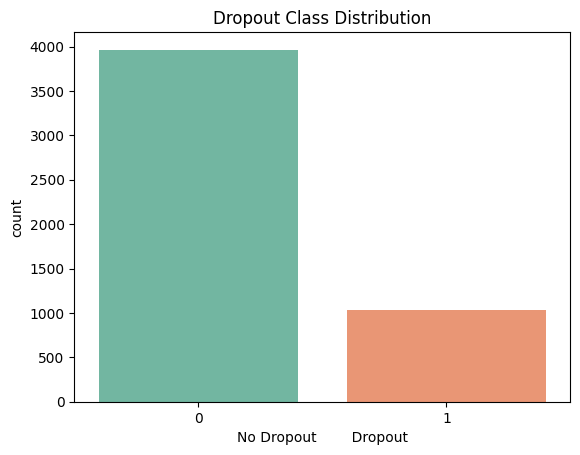

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=copy_data['dropout'], data=copy_data, palette='Set2')
plt.title('Dropout Class Distribution')
plt.xlabel('No Dropout        Dropout')
plt.show()

<i>It is moderately imbalanced — not extremely skewed but enough to potentially bias our model towards predicting class 0 (no dropout) more often.</i>

<i> Will use resampling techniques:

    SMOTE (oversampling minority)

    Undersampling majority class
</i>

Why SMOTE (Oversampling) is better:
<i>

    We have enough data overall — no need to throw away useful samples via undersampling

    SMOTE creates synthetic examples of the minority class instead of duplicating or dropping records

    Preserves all original majority data, giving our model a better understanding of both classes
</i>



When to prefer Undersampling instead:
<i>

    Only when we have very large datasets and training time or memory is a concern

    Or, if SMOTE is overfitting due to noise in minority class
</i>

<i>Before Applying SMOTE We want to Convert Categorical Columns to Numeric 

   Also saving the encoders for reverse mapping.
</i>

In [51]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
X_encoded = copy_data.copy()

for col in X_encoded.columns:
    if X_encoded[col].dtype == 'category':
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col])
        encoders[col] = le  # Save encoder for reverse mapping


In [52]:
encoders

{'school_board': LabelEncoder(),
 'coaching_institute': LabelEncoder(),
 'family_income': LabelEncoder(),
 'parent_education': LabelEncoder(),
 'location_type': LabelEncoder(),
 'peer_pressure_level': LabelEncoder(),
 'mental_health_issues': LabelEncoder(),
 'admission_taken': LabelEncoder()}

<i>Oversample using SMOTE (Synthetic Minority Over-sampling Technique) </i>

In [53]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, X_encoded['dropout'], stratify=X_encoded['dropout'], random_state=42)

smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X_train, Y_train)


<i>Combining X_resampled and Y_resampled into a new DataFrame:</i>

In [54]:
resampled_df = pd.DataFrame(X_resampled, columns=X_train.columns)
resampled_df[Y_train.name] = Y_resampled


In [55]:
resampled_df

,JEE_main_score,JEE_advanced_score,mock_test_score_avg,school_board,HSC_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,70.05,60.66,72.20,0,87.65,2,0,3.70,0,1,1,0,1,0,0
1,45.29,65.47,68.14,2,90.51,1,1,0.30,0,2,0,2,1,0,0
2,87.04,97.72,69.84,0,74.71,1,3,7.00,0,2,1,0,0,1,0
3,89.08,67.55,89.16,0,90.62,2,1,4.90,2,2,2,2,0,0,0
4,71.97,63.44,39.70,0,84.53,2,0,4.20,1,2,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5941,61.84,67.35,83.18,0,91.11,1,2,2.72,1,2,0,2,1,0,1
5942,71.92,53.30,49.52,0,64.62,2,1,7.08,1,1,0,1,0,0,1
5943,61.82,47.76,87.65,0,67.08,1,0,3.85,1,2,0,0,1,0,1
5944,71.93,44.24,44.52,1,69.56,1,0,3.39,1,2,1,1,0,0,1


<i>Checking the imbalance after SMOTE:</i>

In [56]:
copy_data['dropout'].value_counts()

dropout
0    3964
1    1036
Name: count, dtype: int64

In [57]:
resampled_df['dropout'].value_counts()

dropout
0    2973
1    2973
Name: count, dtype: int64

#### <i>Why Reverse Label Encoding? </i>

| Reason                        | Explanation                                                                                                                            |
| ----------------------------- | -------------------------------------------------------------------------------------------------------------------------------------- |
| **Human Interpretability** | Encoded values like `0`, `1`, `2` are not meaningful to humans. Reversing helps us see actual categories like `'ICSE'`, `'CBSE'`, etc. |
| **Visualization Clarity**  | Bar plots, confusion matrices, and reports look more understandable with real labels.                                                  |
| **Result Explanation**     | When sharing results (like feature importance or predictions), using original labels makes insights clearer to stakeholders.           |
| **Debugging/Validation**   | Helps ensure categories were encoded correctly and models are learning meaningful patterns.                                            |


In [58]:
for col in resampled_df.columns:
    if col in encoders:
        le = encoders[col]
        resampled_df[col] = le.inverse_transform(resampled_df[col].astype(int))


In [59]:
resampled_df

,JEE_main_score,JEE_advanced_score,mock_test_score_avg,school_board,HSC_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,70.05,60.66,72.20,CBSE,87.65,2,Allen,3.70,High,HSC,Semi-Urban,High,Yes,No,0
1,45.29,65.47,68.14,State,90.51,1,FIITJEE,0.30,High,PG,Rural,Medium,Yes,No,0
2,87.04,97.72,69.84,CBSE,74.71,1,Self Study,7.00,High,PG,Semi-Urban,High,No,Yes,0
3,89.08,67.55,89.16,CBSE,90.62,2,FIITJEE,4.90,Mid,PG,Urban,Medium,No,No,0
4,71.97,63.44,39.70,CBSE,84.53,2,Allen,4.20,Low,PG,Semi-Urban,High,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5941,61.84,67.35,83.18,CBSE,91.11,1,Local,2.72,Low,PG,Rural,Medium,Yes,No,1
5942,71.92,53.30,49.52,CBSE,64.62,2,FIITJEE,7.08,Low,HSC,Rural,Low,No,No,1
5943,61.82,47.76,87.65,CBSE,67.08,1,Allen,3.85,Low,PG,Rural,High,Yes,No,1
5944,71.93,44.24,44.52,ICSE,69.56,1,Allen,3.39,Low,PG,Semi-Urban,Low,No,No,1


<i>To avoid memory leaks 

    Using the "del" keyword to explicitly delete old DataFrame objects that are no longer needed.    
</i>

In [60]:
del copy_data1, X_encoded

<i> iii) Univariate Analysis -- Analyze individual columns</i>

<i>i) Histogram with KDE (Kernel Density Estimation)  -- Distribution shape of continuous variables

(KDE): Smoothed estimate of the distribution -- helpful to identify skewness,
</i>

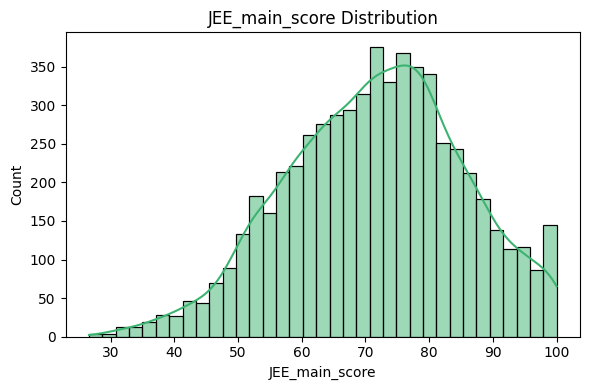

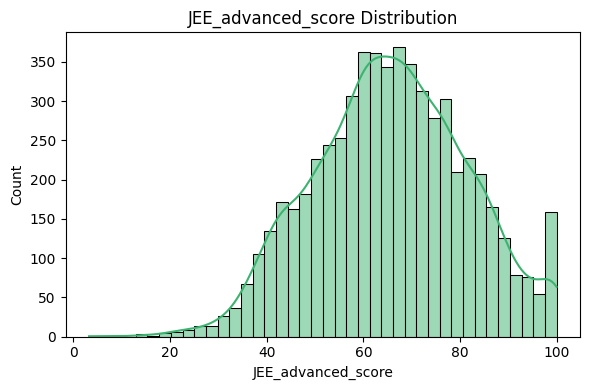

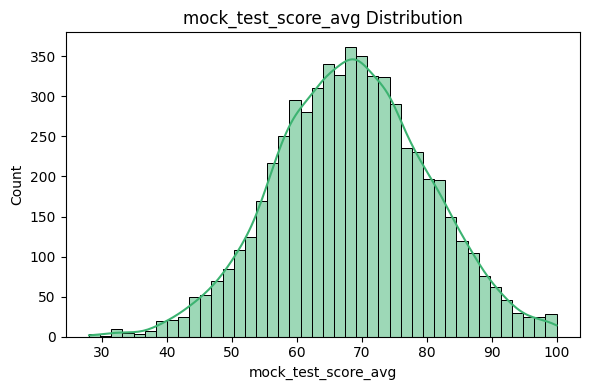

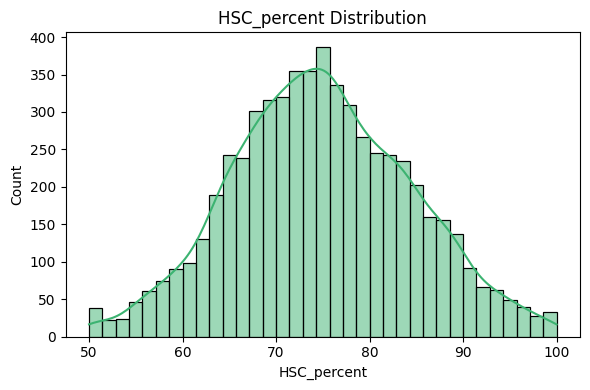

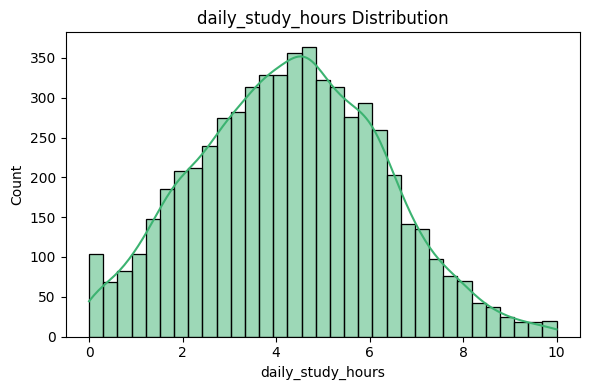

In [61]:
for col in resampled_df.select_dtypes(include=['Float32']).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(resampled_df[col], kde=True, color="mediumseagreen")
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


<i> ii) Boxplot-- Detect outliers and spread</i>

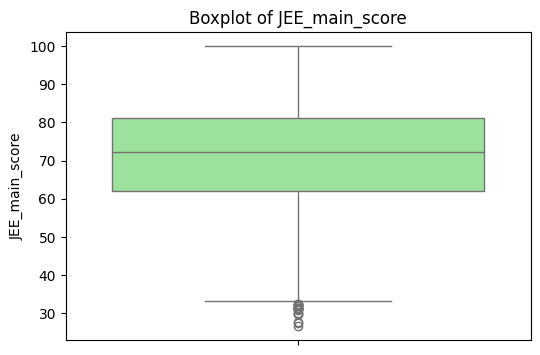

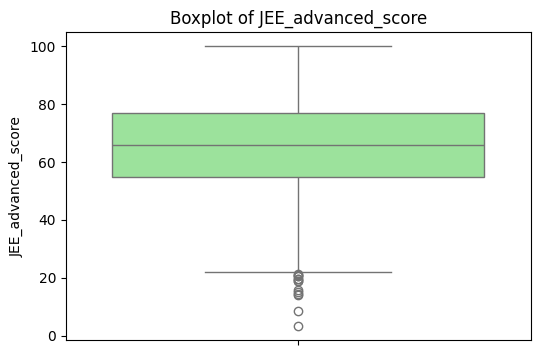

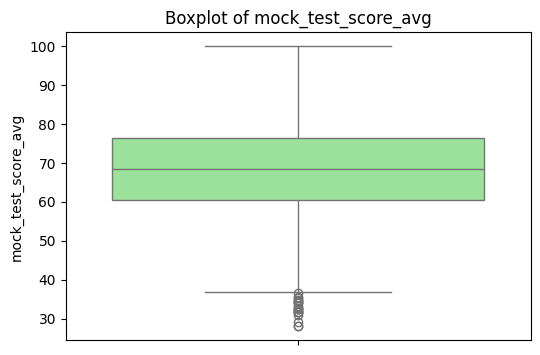

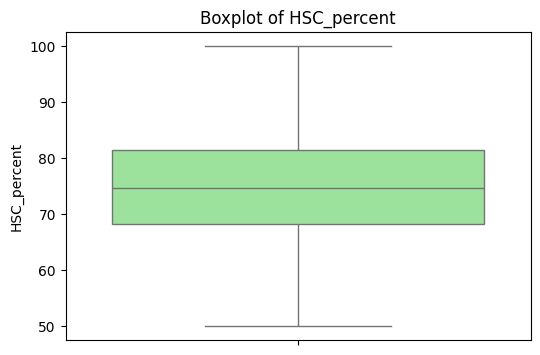

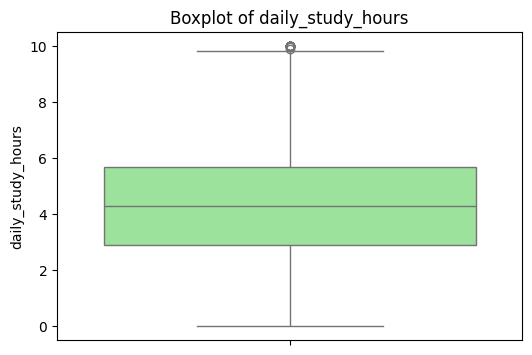

In [62]:
for col in resampled_df.select_dtypes(include=['Float32']).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(resampled_df[col],color='lightgreen')
    plt.title(f"Boxplot of {col}")
    plt.show()


<i> iii)countplot --  Visual representation of Frequency of categorical variables</i>

<i> After SMOTE 'category' type converted to 'object'. So we want to convert it to again 'category' type.</i>

In [63]:
resampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5946 entries, 0 to 5945
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   JEE_main_score        5946 non-null   float32
 1   JEE_advanced_score    5946 non-null   float32
 2   mock_test_score_avg   5946 non-null   float32
 3   school_board          5946 non-null   object 
 4   HSC_percent           5946 non-null   float32
 5   attempt_count         5946 non-null   int8   
 6   coaching_institute    5946 non-null   object 
 7   daily_study_hours     5946 non-null   float32
 8   family_income         5946 non-null   object 
 9   parent_education      5946 non-null   object 
 10  location_type         5946 non-null   object 
 11  peer_pressure_level   5946 non-null   object 
 12  mental_health_issues  5946 non-null   object 
 13  admission_taken       5946 non-null   object 
 14  dropout               5946 non-null   int8   
dtypes: float32(5), int8(2

In [64]:
for col in resampled_df.select_dtypes(include='object').columns:
    resampled_df[col]=resampled_df[col].astype('category')

In [65]:
resampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5946 entries, 0 to 5945
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   JEE_main_score        5946 non-null   float32 
 1   JEE_advanced_score    5946 non-null   float32 
 2   mock_test_score_avg   5946 non-null   float32 
 3   school_board          5946 non-null   category
 4   HSC_percent           5946 non-null   float32 
 5   attempt_count         5946 non-null   int8    
 6   coaching_institute    5946 non-null   category
 7   daily_study_hours     5946 non-null   float32 
 8   family_income         5946 non-null   category
 9   parent_education      5946 non-null   category
 10  location_type         5946 non-null   category
 11  peer_pressure_level   5946 non-null   category
 12  mental_health_issues  5946 non-null   category
 13  admission_taken       5946 non-null   category
 14  dropout               5946 non-null   int8    
dtypes: c

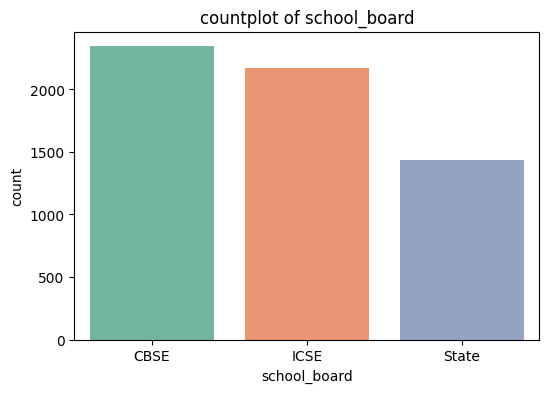

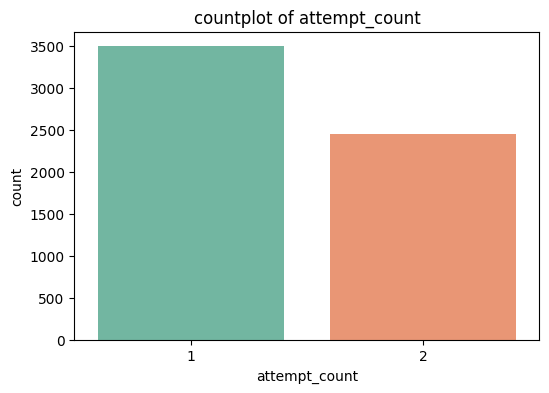

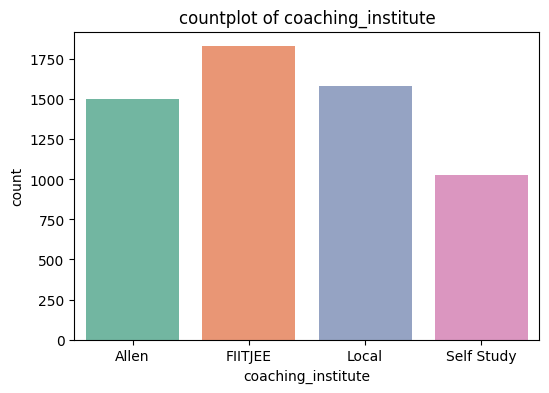

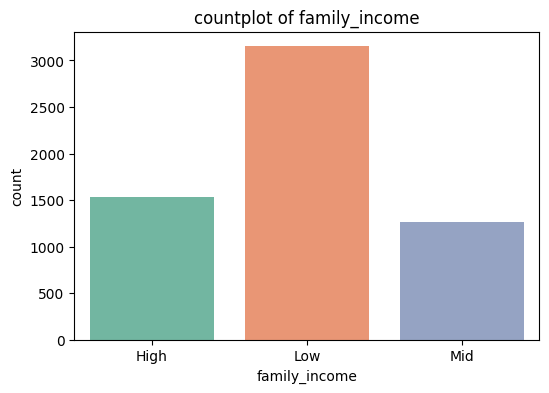

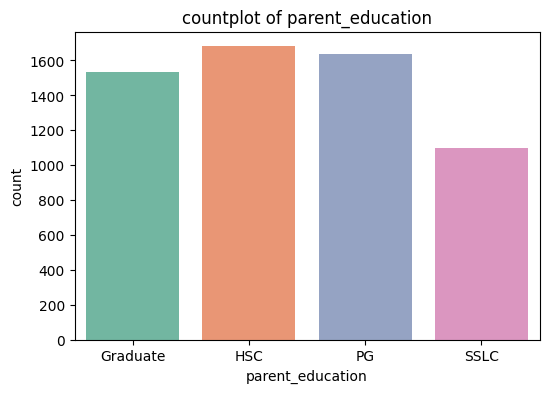

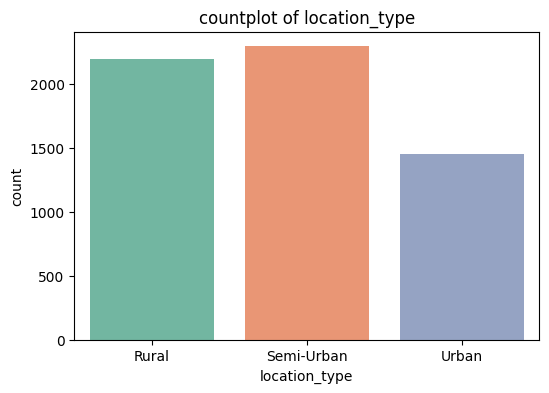

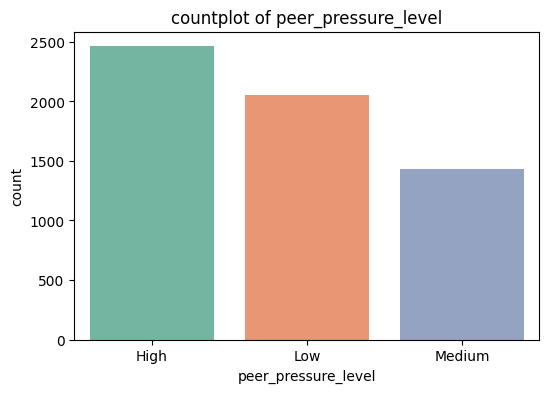

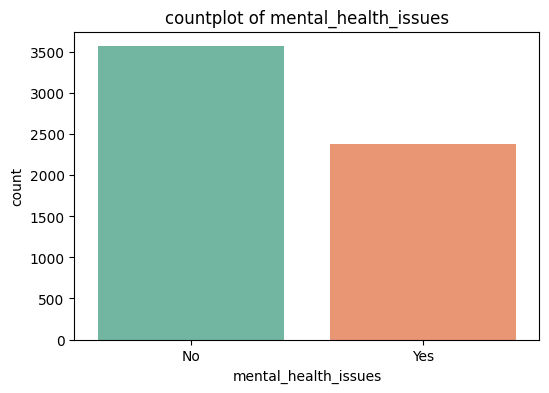

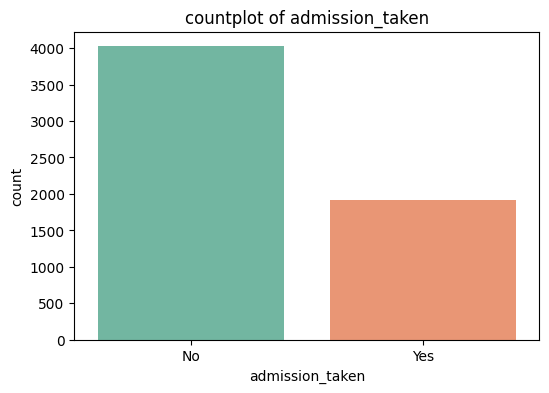

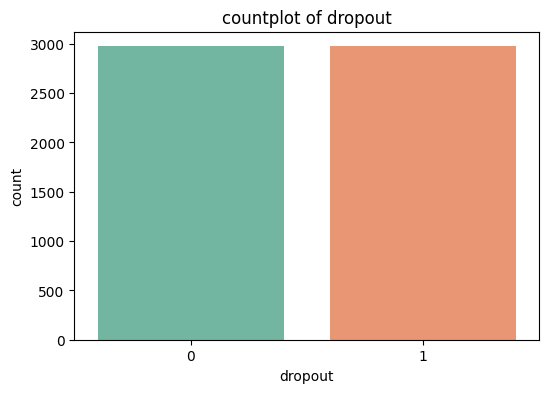

In [66]:
for col in resampled_df.select_dtypes(include=['int8','category']).columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=resampled_df[col], data=resampled_df, palette='Set2')
    plt.title(f"countplot of {col}")
    plt.show()


<i> iv) Bivariate/Multivariate Analysis -- Explore relationships between columns</i>

<i> i) Numeric VS Numeric

    Correlation Heatmap between numerical columns
</i>

<Axes: >

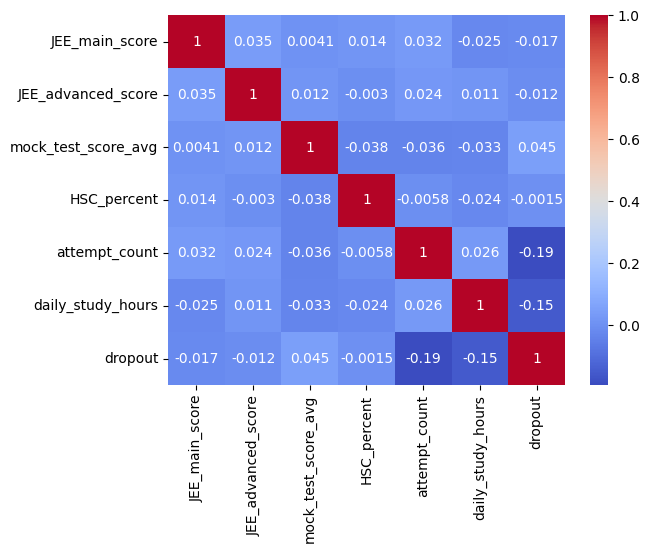

In [67]:
#plt.show()
sns.heatmap(resampled_df.corr(numeric_only=True), annot=True, cmap="coolwarm")

<i> ii) Category VS Category

    Cross Tab  -- "How are the categories of one variable distributed across another?"
</i>

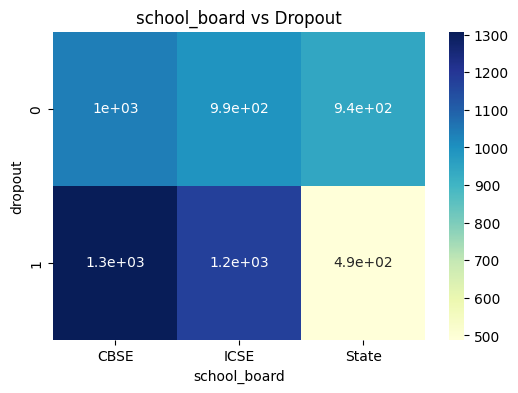

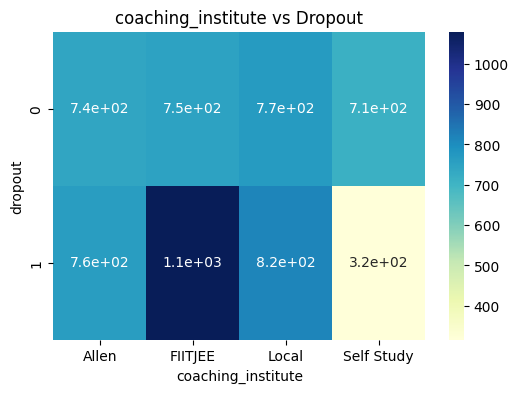

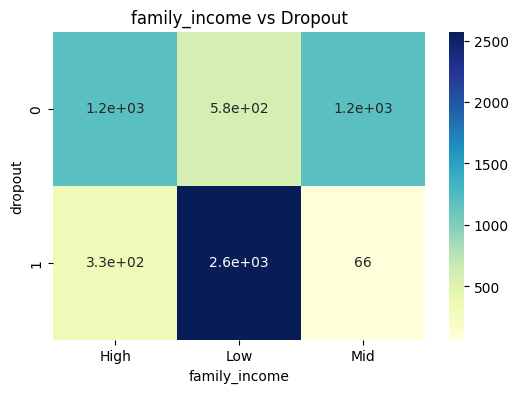

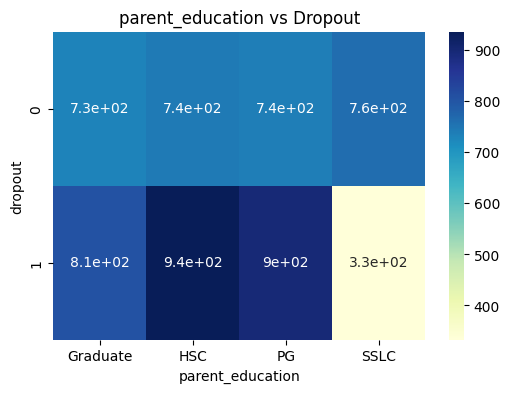

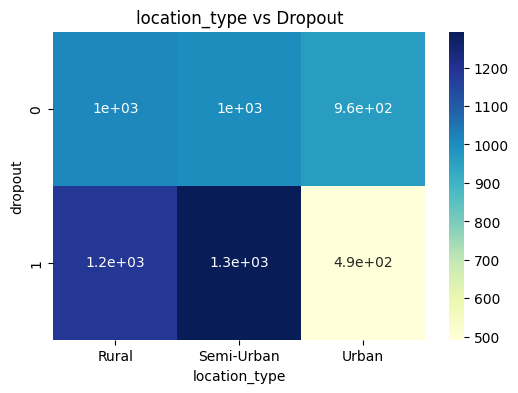

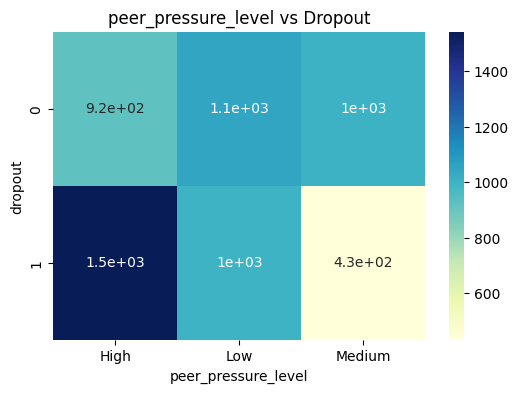

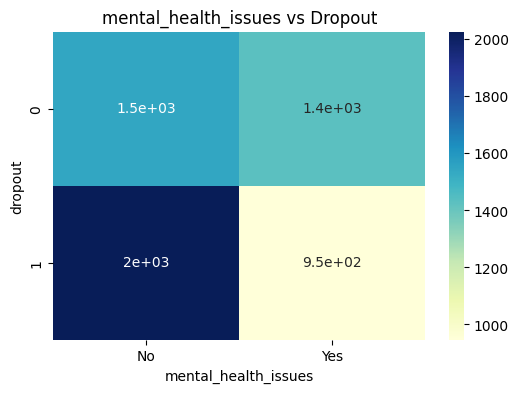

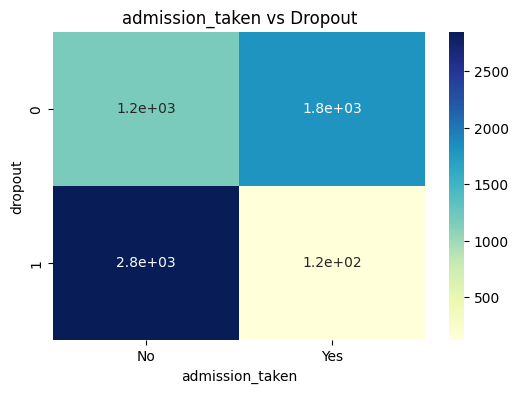

In [68]:
for col in resampled_df.select_dtypes(include='category').columns:
    plt.figure(figsize=(6, 4))
    plt.title(f"{col} vs Dropout")
    sns.heatmap(pd.crosstab(resampled_df['dropout'], resampled_df[col]), annot=True, cmap='YlGnBu')

<i> iii) Numeric VS Categorical     ----         Group-wise Analysis

    Average Score of different score columns with different category -- Identify Patterns & Trends  
    
    Helps identify factors that affect performance
</i>

In [69]:
avg_column=['JEE_main_score', 'JEE_advanced_score', 'mock_test_score_avg', 'HSC_percent','daily_study_hours']

for col in avg_column:
    avg_score = resampled_df.groupby('attempt_count')[col].mean().reset_index()
    print("\n",avg_score)
    


    attempt_count  JEE_main_score
0              1           71.23
1              2           72.13

    attempt_count  JEE_advanced_score
0              1               65.39
1              2               66.17

    attempt_count  mock_test_score_avg
0              1                68.84
1              2                67.98

    attempt_count  HSC_percent
0              1        74.92
1              2        74.81

    attempt_count  daily_study_hours
0              1               4.26
1              2               4.37


In [70]:
avg_column=['JEE_main_score', 'JEE_advanced_score', 'mock_test_score_avg', 'HSC_percent','daily_study_hours']

for col in avg_column:
    avg_score = resampled_df.groupby('dropout')[col].mean().reset_index()
    print("\n",avg_score)
    


    dropout  JEE_main_score
0        0           71.84
1        1           71.36

    dropout  JEE_advanced_score
0        0               65.89
1        1               65.53

    dropout  mock_test_score_avg
0        0                67.96
1        1                69.01

    dropout  HSC_percent
0        0        74.89
1        1        74.86

    dropout  daily_study_hours
0        0               4.61
1        1               4.00


In [71]:
avg_column=['JEE_main_score', 'JEE_advanced_score', 'mock_test_score_avg', 'HSC_percent','daily_study_hours']

for col in avg_column:
    avg_score = resampled_df.groupby('school_board')[col].mean().reset_index()
    print("\n",avg_score)
    


   school_board  JEE_main_score
0         CBSE           71.39
1         ICSE           71.75
2        State           71.72

   school_board  JEE_advanced_score
0         CBSE               65.05
1         ICSE               66.15
2        State               66.12

   school_board  mock_test_score_avg
0         CBSE                68.73
1         ICSE                68.40
2        State                68.21

   school_board  HSC_percent
0         CBSE        74.95
1         ICSE        74.75
2        State        74.94

   school_board  daily_study_hours
0         CBSE               4.27
1         ICSE               4.28
2        State               4.39


In [72]:
avg_column=['JEE_main_score', 'JEE_advanced_score', 'mock_test_score_avg', 'HSC_percent','daily_study_hours']

for col in avg_column:
    avg_score = resampled_df.groupby('coaching_institute')[col].mean().reset_index()
    print("\n",avg_score)
    


   coaching_institute  JEE_main_score
0              Allen           72.31
1            FIITJEE           71.33
2              Local           71.59
3         Self Study           71.07

   coaching_institute  JEE_advanced_score
0              Allen               66.32
1            FIITJEE               65.22
2              Local               65.54
3         Self Study               65.96

   coaching_institute  mock_test_score_avg
0              Allen                68.82
1            FIITJEE                68.55
2              Local                68.30
3         Self Study                68.15

   coaching_institute  HSC_percent
0              Allen        74.43
1            FIITJEE        74.90
2              Local        75.31
3         Self Study        74.80

   coaching_institute  daily_study_hours
0              Allen               4.38
1            FIITJEE               4.22
2              Local               4.27
3         Self Study               4.40


In [73]:
avg_column=['JEE_main_score', 'JEE_advanced_score', 'mock_test_score_avg', 'HSC_percent','daily_study_hours']

for col in avg_column:
    avg_score = resampled_df.groupby('peer_pressure_level')[col].mean().reset_index()
    print("\n",avg_score)
    


   peer_pressure_level  JEE_main_score
0                High           72.63
1                 Low           70.64
2              Medium           71.21

   peer_pressure_level  JEE_advanced_score
0                High               65.68
1                 Low               66.05
2              Medium               65.27

   peer_pressure_level  mock_test_score_avg
0                High                68.91
1                 Low                68.02
2              Medium                68.42

   peer_pressure_level  HSC_percent
0                High        75.08
1                 Low        74.98
2              Medium        74.37

   peer_pressure_level  daily_study_hours
0                High               4.04
1                 Low               4.47
2              Medium               4.53


In [74]:
avg_column=['JEE_main_score', 'JEE_advanced_score', 'mock_test_score_avg', 'HSC_percent','daily_study_hours']

for col in avg_column:
    avg_score = resampled_df.groupby('mental_health_issues')[col].mean().reset_index()
    print("\n",avg_score)
    


   mental_health_issues  JEE_main_score
0                   No           71.61
1                  Yes           71.59

   mental_health_issues  JEE_advanced_score
0                   No               65.29
1                  Yes               66.34

   mental_health_issues  mock_test_score_avg
0                   No                68.76
1                  Yes                68.08

   mental_health_issues  HSC_percent
0                   No        74.63
1                  Yes        75.25

   mental_health_issues  daily_study_hours
0                   No               4.24
1                  Yes               4.41


<i> v) Outliers observation & removal </i>

In [75]:
resampled_df.describe(include='number')

,JEE_main_score,JEE_advanced_score,mock_test_score_avg,HSC_percent,attempt_count,daily_study_hours,dropout
count,5946.00,5946.00,5946.00,5946.00,5946.00,5946.00,5946.00
mean,71.60,65.71,68.49,74.87,1.41,4.30,0.50
std,13.87,15.82,11.67,9.59,0.49,1.97,0.50
min,26.62,3.24,28.05,50.00,1.00,0.00,0.00
25%,61.95,54.80,60.44,68.25,1.00,2.90,0.00
50%,72.21,65.74,68.41,74.62,1.00,4.30,0.50
75%,81.12,76.76,76.32,81.53,2.00,5.70,1.00
max,100.00,100.00,100.00,100.00,2.00,10.00,1.00


<i>     
    “Outliers observed in scores and study hours are retained as they represent <b>natural variations </b> in student performance and behavior, rather than <b>data anomalies.</b>”
</i>

<i>
<b>When Outliers Should Not Be Removed:</b>

    If they are real and meaningful:

In exam scores, someone scoring very high (topper) or very low (struggler) is not an error — it's part of natural variation.

In study hours, some students may genuinely study 1 hour or 12 hours, and that's valid behavior.

    When outliers carry important information:

For example, students with extremely low study hours and high scores might reveal smart study strategies.

Similarly, extremely high scores can help understand success patterns.
</i>

<i>
<b>When Outliers Should Be Considered for Removal or Treatment:</b>


    If they are due to data entry errors or anomalies:

Eg: daily_study_hours >= 25 (which is impossible).

test_score = -5 or >100 (violates scale).
</i>

<i> Vi)  Feature Engineering

    Binning / Grouping  -- simplifies continuous data by converting it into categories
</i>

In [76]:
bins = [0, 2, 4, 6, 8, 10]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
resampled_df['study_hour_bins'] = pd.cut(resampled_df['daily_study_hours'], bins=bins, labels=labels)


In [77]:
resampled_df

,JEE_main_score,JEE_advanced_score,mock_test_score_avg,school_board,HSC_percent,attempt_count,coaching_institute,daily_study_hours,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout,study_hour_bins
0,70.05,60.66,72.20,CBSE,87.65,2,Allen,3.70,High,HSC,Semi-Urban,High,Yes,No,0,Low
1,45.29,65.47,68.14,State,90.51,1,FIITJEE,0.30,High,PG,Rural,Medium,Yes,No,0,Very Low
2,87.04,97.72,69.84,CBSE,74.71,1,Self Study,7.00,High,PG,Semi-Urban,High,No,Yes,0,High
3,89.08,67.55,89.16,CBSE,90.62,2,FIITJEE,4.90,Mid,PG,Urban,Medium,No,No,0,Medium
4,71.97,63.44,39.70,CBSE,84.53,2,Allen,4.20,Low,PG,Semi-Urban,High,No,Yes,0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5941,61.84,67.35,83.18,CBSE,91.11,1,Local,2.72,Low,PG,Rural,Medium,Yes,No,1,Low
5942,71.92,53.30,49.52,CBSE,64.62,2,FIITJEE,7.08,Low,HSC,Rural,Low,No,No,1,High
5943,61.82,47.76,87.65,CBSE,67.08,1,Allen,3.85,Low,PG,Rural,High,Yes,No,1,Low
5944,71.93,44.24,44.52,ICSE,69.56,1,Allen,3.39,Low,PG,Semi-Urban,Low,No,No,1,Low


<i>Changing the order of columns</i>

In [78]:
resampled_df.columns

Index(['JEE_main_score', 'JEE_advanced_score', 'mock_test_score_avg',
       'school_board', 'HSC_percent', 'attempt_count', 'coaching_institute',
       'daily_study_hours', 'family_income', 'parent_education',
       'location_type', 'peer_pressure_level', 'mental_health_issues',
       'admission_taken', 'dropout', 'study_hour_bins'],
      dtype='object')

In [79]:
resampled_df=resampled_df[['JEE_main_score', 'JEE_advanced_score', 'mock_test_score_avg',
       'school_board', 'HSC_percent', 'attempt_count', 'coaching_institute',
       'daily_study_hours','study_hour_bins', 'family_income', 'parent_education',
       'location_type', 'peer_pressure_level', 'mental_health_issues',
       'admission_taken', 'dropout']]

In [80]:
resampled_df

,JEE_main_score,JEE_advanced_score,mock_test_score_avg,school_board,HSC_percent,attempt_count,coaching_institute,daily_study_hours,study_hour_bins,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,70.05,60.66,72.20,CBSE,87.65,2,Allen,3.70,Low,High,HSC,Semi-Urban,High,Yes,No,0
1,45.29,65.47,68.14,State,90.51,1,FIITJEE,0.30,Very Low,High,PG,Rural,Medium,Yes,No,0
2,87.04,97.72,69.84,CBSE,74.71,1,Self Study,7.00,High,High,PG,Semi-Urban,High,No,Yes,0
3,89.08,67.55,89.16,CBSE,90.62,2,FIITJEE,4.90,Medium,Mid,PG,Urban,Medium,No,No,0
4,71.97,63.44,39.70,CBSE,84.53,2,Allen,4.20,Medium,Low,PG,Semi-Urban,High,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5941,61.84,67.35,83.18,CBSE,91.11,1,Local,2.72,Low,Low,PG,Rural,Medium,Yes,No,1
5942,71.92,53.30,49.52,CBSE,64.62,2,FIITJEE,7.08,High,Low,HSC,Rural,Low,No,No,1
5943,61.82,47.76,87.65,CBSE,67.08,1,Allen,3.85,Low,Low,PG,Rural,High,Yes,No,1
5944,71.93,44.24,44.52,ICSE,69.56,1,Allen,3.39,Low,Low,PG,Semi-Urban,Low,No,No,1


#### <i>iv) Preparing Clean Final Dataset</i>

<i> i) Selecting only useful columns</i>

In [81]:
resampled_df.drop(columns="daily_study_hours",inplace=True)

In [82]:
resampled_df

,JEE_main_score,JEE_advanced_score,mock_test_score_avg,school_board,HSC_percent,attempt_count,coaching_institute,study_hour_bins,family_income,parent_education,location_type,peer_pressure_level,mental_health_issues,admission_taken,dropout
0,70.05,60.66,72.20,CBSE,87.65,2,Allen,Low,High,HSC,Semi-Urban,High,Yes,No,0
1,45.29,65.47,68.14,State,90.51,1,FIITJEE,Very Low,High,PG,Rural,Medium,Yes,No,0
2,87.04,97.72,69.84,CBSE,74.71,1,Self Study,High,High,PG,Semi-Urban,High,No,Yes,0
3,89.08,67.55,89.16,CBSE,90.62,2,FIITJEE,Medium,Mid,PG,Urban,Medium,No,No,0
4,71.97,63.44,39.70,CBSE,84.53,2,Allen,Medium,Low,PG,Semi-Urban,High,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5941,61.84,67.35,83.18,CBSE,91.11,1,Local,Low,Low,PG,Rural,Medium,Yes,No,1
5942,71.92,53.30,49.52,CBSE,64.62,2,FIITJEE,High,Low,HSC,Rural,Low,No,No,1
5943,61.82,47.76,87.65,CBSE,67.08,1,Allen,Low,Low,PG,Rural,High,Yes,No,1
5944,71.93,44.24,44.52,ICSE,69.56,1,Allen,Low,Low,PG,Semi-Urban,Low,No,No,1


<i> ii) Renaming columns for clarity and readability</i>

In [83]:
rename_map = {
    'JEE_main_score': 'JEE Main %',
    'JEE_advanced_score': 'JEE Advanced %',
    'mock_test_score_avg': 'Mock Avg %',
    'school_board': 'School Board',
    'HSC_percent': 'HSC %',
    'attempt_count': 'Attempts',
    'coaching_institute': 'Coaching',
    'study_hour_bins': 'Study Hour Bin',
    'family_income': 'Family Income',
    'parent_education': 'Parent Education',
    'location_type': 'Location Type',
    'peer_pressure_level': 'Peer Pressure Level',
    'mental_health_issues': 'Mental Health',
    'admission_taken': 'Admission',
    'dropout': 'Dropout'
}

resampled_df.rename(columns=rename_map,inplace=True)

In [84]:
resampled_df

,JEE Main %,JEE Advanced %,Mock Avg %,School Board,HSC %,Attempts,Coaching,Study Hour Bin,Family Income,Parent Education,Location Type,Peer Pressure Level,Mental Health,Admission,Dropout
0,70.05,60.66,72.20,CBSE,87.65,2,Allen,Low,High,HSC,Semi-Urban,High,Yes,No,0
1,45.29,65.47,68.14,State,90.51,1,FIITJEE,Very Low,High,PG,Rural,Medium,Yes,No,0
2,87.04,97.72,69.84,CBSE,74.71,1,Self Study,High,High,PG,Semi-Urban,High,No,Yes,0
3,89.08,67.55,89.16,CBSE,90.62,2,FIITJEE,Medium,Mid,PG,Urban,Medium,No,No,0
4,71.97,63.44,39.70,CBSE,84.53,2,Allen,Medium,Low,PG,Semi-Urban,High,No,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5941,61.84,67.35,83.18,CBSE,91.11,1,Local,Low,Low,PG,Rural,Medium,Yes,No,1
5942,71.92,53.30,49.52,CBSE,64.62,2,FIITJEE,High,Low,HSC,Rural,Low,No,No,1
5943,61.82,47.76,87.65,CBSE,67.08,1,Allen,Low,Low,PG,Rural,High,Yes,No,1
5944,71.93,44.24,44.52,ICSE,69.56,1,Allen,Low,Low,PG,Semi-Urban,Low,No,No,1


<i> iii) Saving cleaned dataset to CSV / EXCEL for creating dashboard and reports</i>

In [85]:
csv_path="C:\\Users\\admin\\OneDrive\\Desktop\\PRACTICE_PROJECT\\PROJECT1\\DATASET\\Output_Dataset_JEE_Dropout.csv"
resampled_df.to_csv(csv_path,index=False)

<h1>Machine Learning model will upload Later</h1>